# 分類器の制度指標

In [73]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [5]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]])

In [9]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

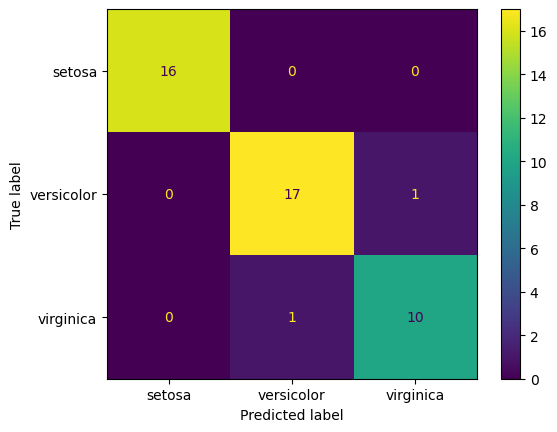

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
# 混合行列で正過を判定

# Accuracy

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [7]:
# サンプルデータ
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

In [8]:
accuracy_score(y_true, y_pred)

0.5

# Precision

In [9]:
precision_score(y_true, y_pred)

0.6

# Recoll(Sensitivity)

In [10]:
recall_score(y_true, y_pred)

0.6

# Specificity

In [11]:
np.array(y_true)!=1

array([False, False,  True, False,  True,  True, False, False])

In [12]:
recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

## 多クラス分類におけるPrecision

In [26]:
# macro平均：くらすれべるで平均を取る　Accuracy
# micro平均:データレベルで平均を取る Precision, Recall, Specificityのmicro平均はAccuracyと同じになる

df = sns.load_dataset('iris')
x_col = 'species'

X = df.drop(columns=x_col)
y = df[x_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [27]:
# average=None
print(precision_score(y_test, y_pred, average=None))
# average=macro
print(precision_score(y_test, y_pred, average='macro'))
# average=micro
print(precision_score(y_test, y_pred, average='micro'))

print(accuracy_score(y_test, y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


# Precision Recoll Curve

### PrecisionとRecallはトレードオフの関係
### 分類器は通常、確率の閾値によって分類ラベルを決定する。閾値の調整によりそれぞれの制度指標をコントロールすることができる。

In [36]:
df = pd.read_csv('heart_preprocessed.csv')
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [37]:
y_pred_proba[:10]

array([[0.49520576, 0.50479424],
       [0.28366806, 0.71633194],
       [0.99732492, 0.00267508],
       [0.06897636, 0.93102364],
       [0.47851485, 0.52148515],
       [0.99002332, 0.00997668],
       [0.66307889, 0.33692111],
       [0.79275385, 0.20724615],
       [0.3021326 , 0.6978674 ],
       [0.3021326 , 0.6978674 ]])

In [55]:
from sklearn.metrics import precision_recall_curve, recall_score, precision_score
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba[:, 1])

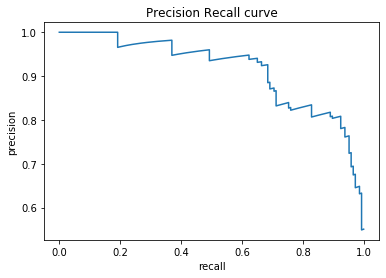

In [18]:
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall curve')
plt.show()

In [44]:
precision[-1]

1.0

In [46]:
recall[-1]

0.0

In [47]:
print(len(precision))
print(len(recall))
print(len(threshold))

210
210
209


# F値

In [48]:
from sklearn.metrics import f1_score

In [60]:
y_true = [1, 0, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

f1_score(y_true, y_pred)

0.4444444444444445

In [61]:
# 超和平均ver
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

In [62]:
recall_score(y_true, y_pred)

0.5

In [63]:
precision_score(y_true, y_pred)

0.4

In [67]:
f1_scores = [hmean([p, r]) for p, r in zip(precision, recall)]
f1_scores[:10]

[0.6547085201793722,
 0.6576576576576577,
 0.6606334841628959,
 0.6621315192743764,
 0.6651480637813211,
 0.6666666666666666,
 0.6681922196796338,
 0.6697247706422018,
 0.6712643678160919,
 0.6743648960739029]

89th threshhold(=0.00035686961425157815) is the highest f1 scores = 0.8626198083067093


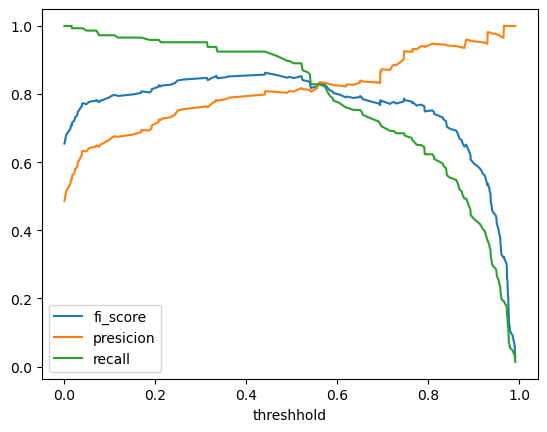

In [78]:
plt.plot(threshold, f1_scores[:-1], label='fi_score')
plt.plot(threshold, precision[:-1], label='presicion')
plt.plot(threshold, recall[:-1], label='recall')
plt.xlabel('threshhold')
plt.legend()
print(f'{np.argmax(f1_scores)}th threshhold(={threshold[np.argmax(f1_score)]}) is the highest f1 scores = {np.max(f1_scores)}')

# ROC
- Sensitivity(Recall)とSpecifityはトレードオフの関係にある
- 分類器の中で最も使われる指標の一つ
- ROCの横軸はSowcificityではなく1-Specificity

In [79]:
from sklearn.metrics import roc_curve

In [94]:
fpr, tpr, threshholds = roc_curve(y_test, y_pred_proba[:, 1])


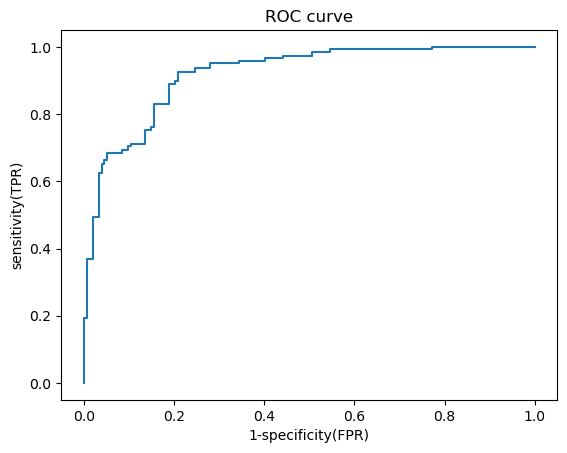

In [95]:
plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')
plt.title('ROC curve')
plt.show()

# AUC
- ROCにおける制度を数値化したもの
- ROCが作る面積
- 1が最大で、ランダムな分類気で0.5になる

In [96]:
from sklearn.metrics import auc

In [97]:
auc(fpr, tpr)

0.919542785981142

## 他クラスROC
- 多クラス分類の場合macro平均もしくはmicro平均をする
- macro平均: OvRでクラス数分のROCを描画し、その平均を取る
- micro平均：　OvRとした時の結果（FRP,TPR）でまとめてROCを描く

In [98]:
df = sns.load_dataset('iris')

y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

## macro平均

In [99]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

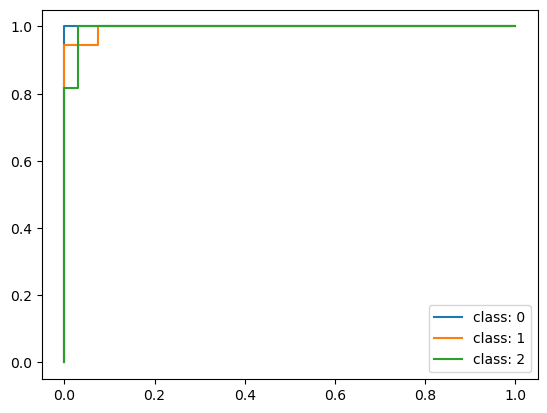

In [100]:
# それぞれのクラスのROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
    plt.legend()

In [90]:
all_x = np.arange(7)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
np.interp(all_x, data_x, data_y)


array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [91]:
# 必要なxの値のリスト
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# 線形補完
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / n_classes

In [92]:
mean_tpr

array([0.92087542, 0.98148148, 1.        , 1.        ])

In [93]:
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'],tpr['macro'])

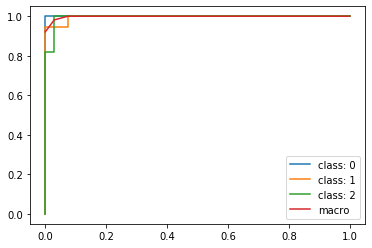

In [94]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()

# micro平均

In [95]:
y_test_one_hot.ravel()

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0])

In [97]:
y_pred_proba.ravel()

array([1.31648210e-04, 5.98356312e-02, 9.40032721e-01, 1.33564768e-02,
       9.57043007e-01, 2.96005158e-02, 9.82914113e-01, 1.70858312e-02,
       5.56709366e-08, 1.60361547e-06, 2.60882112e-02, 9.73910185e-01,
       9.68270879e-01, 3.17288859e-02, 2.35553774e-07, 2.47548986e-06,
       6.75472150e-03, 9.93242803e-01, 9.80355908e-01, 1.96439887e-02,
       1.03116327e-07, 3.00681360e-03, 7.50190356e-01, 2.46802830e-01,
       1.62207645e-03, 7.41319289e-01, 2.57058635e-01, 2.11319905e-02,
       9.32808060e-01, 4.60599495e-02, 1.02491302e-04, 1.57202370e-01,
       8.42695138e-01, 7.26156515e-03, 8.08730298e-01, 1.84008137e-01,
       4.34536937e-03, 7.84037038e-01, 2.11617593e-01, 3.22960003e-03,
       7.61224519e-01, 2.35545881e-01, 4.09016489e-03, 7.03071946e-01,
       2.92837889e-01, 9.81568426e-01, 1.84314902e-02, 8.41269509e-08,
       7.00837195e-03, 7.50180268e-01, 2.42811360e-01, 1.20087375e-02,
       8.31543639e-01, 1.56447624e-01, 9.65468106e-01, 3.45315825e-02,
      

In [99]:
fpr['micro'], tpr['micro'], _ =  roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

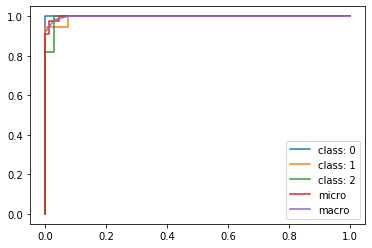

In [101]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()